<a href="https://colab.research.google.com/github/nteuthorn/Thinkful_Capstone1/blob/master/Capstone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import libraries

import pandas as pd
import numpy as np
from scipy import stats
from scipy import mean
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Import player data

players = pd.read_csv('/content/drive/My Drive/Data Science Projects/Thinkful/Completed/Capstone 1/Seasons_Stats.csv')
players.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
#Import standings data

standings = pd.read_csv('/content/drive/My Drive/Data Science Projects/Thinkful/Completed/Capstone 1/Team_Records.csv')
standings.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics*,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics*,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics*,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [5]:
#Format Season data to match Year in players dataframe

standings['Season'] = standings['Season'].str.slice(0,4).astype(int) + 1

In [6]:
#Limit players dataframe and standings dataframe to only 1982-2017 seasons

y82_players = players[(players['Year'] > 1982)].copy()
y82_standings = standings[(standings['Season'] > 1982)].copy()
y82_standings = y82_standings[(y82_standings['Season'] < 2018)]

In [7]:
y82_players['Tm'].unique()

array(['LAL', 'PHO', 'DAL', 'BOS', 'DEN', 'TOT', 'PHI', 'UTA', 'SDC',
       'CLE', 'NJN', 'HOU', 'WSB', 'SAS', 'DET', 'CHI', 'IND', 'GSW',
       'MIL', 'SEA', 'ATL', 'POR', 'NYK', 'KCK', 'LAC', 'SAC', 'CHH',
       'MIA', 'ORL', 'MIN', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA',
       'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [8]:
#Define regular expressions for team name acronyms

acronyms = {'^Atlanta[ a-zA-Z*]+': 'ATL', '^Brooklyn[ a-zA-Z*]+': 'BRK', '^Boston[ a-zA-Z*]+': 'BOS', 
            '^Charlotte[ a-zA-Z*]+': 'CHA', '^Chicago[ a-zA-Z*]+': 'CHI', 
            '^Cleveland[ a-zA-Z*]+': 'CLE', '^Dallas[ a-zA-Z*]+': 'DAL', '^Denver[ a-zA-Z*]+': 'DEN', 
            '^Detroit[ a-zA-Z*]+': 'DET', '^Golden State[ a-zA-Z*]+': 'GSW', 
            '^Houston[ a-zA-Z*]+': 'HOU', '^Indiana[ a-zA-Z*]+': 'IND', '^Los Angeles C[ a-zA-Z*]+': 'LAC', 
            '^Los Angeles L[ a-zA-Z*]+': 'LAL', 
            '^Memphis[ a-zA-Z*]+': 'MEM', '^Miami[ a-zA-Z*]+': 'MIA', '^Milwaukee[ a-zA-Z*]+': 'MIL', 
            '^Minnesota[ a-zA-Z*]+': 'MIN', '^New Orleans[ a-zA-Z*/]+': 'NOP', 
            '^New York[ a-zA-Z*]+': 'NYK', '^Oklahoma City[ a-zA-Z*]+': 'OKC', '^Orlando[ a-zA-Z*]+': 'ORL', 
            '^Philadelphia[ a-zA-Z*0-9]+': 'PHI', 
            '^Phoenix[ a-zA-Z*]+': 'PHO', '^Portland[ a-zA-Z*]+': 'POR', '^Sacramento[ a-zA-Z*]+': 'SAC', 
            '^San Antonio[ a-zA-Z*]+': 'SAS', 
            '^Toronto[ a-zA-Z*]+': 'TOR', '^Utah[ a-zA-Z*]+': 'UTA', '^Washington[ a-zA-Z*]+': 'WAS',
            '^Vancouver[ a-zA-Z*]+': 'MEM', '^New Jersey[ a-zA-Z*]+': 'BRK', '^Seattle[ a-zA-Z*]+': 'OKC',
            '^San Diego[ a-zA-Z*]+': 'LAC', '^Kansas City[ a-zA-Z*]+': 'SAC'}

In [9]:
#Format Team data in standings dataframe to match Tm in players dataframe

y82_standings['Team'].replace(acronyms, regex = True, inplace = True)

#Check that all Team names have been updated
y82_standings['Team'].unique()

array(['BOS', 'TOR', 'NYK', 'PHI', 'BRK', 'MIN', 'OKC', 'DEN', 'POR',
       'UTA', 'CLE', 'DET', 'MIL', 'IND', 'CHI', 'GSW', 'LAC', 'PHO',
       'SAC', 'LAL', 'WAS', 'MIA', 'CHA', 'ORL', 'ATL', 'HOU', 'SAS',
       'NOP', 'DAL', 'MEM'], dtype=object)

In [10]:
#Convert playoff result column to ordinal numerical variable

y82_standings['Playoffs'].fillna(0, inplace=True)

results = {'Lost W. Conf. 1st Rnd.': 1, 'Lost E. Conf. 1st Rnd.': 1, 'Lost W. Conf. Semis': 2, 'Lost E. Conf. Semis': 2, 
           'Lost W. Conf. Finals': 3, 'Lost E. Conf. Finals': 3, 'Lost Finals': 4, 'Won Finals': 5}

y82_standings['Playoffs'].replace(results, inplace = True)

In [11]:
#Separate Top Win Shares column into player name and win shares value as float

y82_standings['Top Performer'] = y82_standings['Top WS'].apply(lambda x: x.split('(')[0][:-1])
y82_standings['Top WS'] = y82_standings['Top WS'].apply(lambda x: x.split('(')[1][:-1]).astype(float)

In [12]:
#Correct Tm data in players dataframe to combine acronym changes due to team moves (e.g. New Jersey Nets -> Brooklyn Nets)

y82_players['Tm'].replace({'NOH': 'NOP', 'CHO': 'CHA', 'SDC': 'LAC', 'NJN': 'BRK',
                            'WSB': 'WAS', 'SEA': 'OKC', 'KCK': 'SAC', 'VAN': 'MEM',
                             'NOK': 'NOP', 'CHH': 'CHA'}, inplace=True)

#Check that all team names have been properly updated
y82_players['Tm'].unique()

array(['LAL', 'PHO', 'DAL', 'BOS', 'DEN', 'TOT', 'PHI', 'UTA', 'LAC',
       'CLE', 'BRK', 'HOU', 'WAS', 'SAS', 'DET', 'CHI', 'IND', 'GSW',
       'MIL', 'OKC', 'ATL', 'POR', 'NYK', 'SAC', 'CHA', 'MIA', 'ORL',
       'MIN', 'MEM', 'TOR', 'NOP'], dtype=object)

In [13]:
#Create %GS (percent of games started) category
#Create role category, 2 = starter (starts more than 50% of games played), 1 = key reserve (not starter, 
#plays at least 35% of games in the season, or 29 games in an 82 game season), 0 = bench player

y82_players['%GS'] = y82_players['GS']/y82_players['G']
y82_players['Role'] = 0

y82_players.loc[y82_players['G'] > 29, 'Role'] = 1
y82_players.loc[y82_players['%GS'] > 0.5, 'Role'] = 2

In [14]:
y82_players.reset_index(inplace=True)

In [15]:
y82_players.drop(['index', 'Unnamed: 0', 'blanl', 'blank2'], axis=1, inplace=True)

In [16]:
#Format Year data in players dataframe to match standings dataframe

y82_players['Year'] = y82_players['Year'].astype(int)

In [17]:
#Rename season and team columns to match column names in players dataframe

y82_standings.rename(columns = {'Season': 'Year', 'Team': 'Tm'}, inplace = True)

In [18]:
#Define function to reformat Pos variable to remove joined positions (eg PG-SG -> PG)

def pos_edit(s):
    if '-' in s:
        return str(s.split('-')[0])
    else:
        return s

In [19]:
#Apply reformatting function and create POS_final column to use in analysis

y82_players['Pos'] = y82_players['Pos'].apply(lambda x: pos_edit(x))

In [20]:
#Combine player statistics and team standings into single table

player_w_standings = pd.merge(y82_players, y82_standings, on = ['Year', 'Tm'])

In [21]:
player_w_standings.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,%GS,Role,Lg,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS,Top Performer
0,1983,Kareem Abdul-Jabbar*,C,35.0,LAL,79.0,79.0,2554.0,23.6,0.619,0.002,0.302,7.6,17.6,12.8,10.8,1.1,3.5,12.6,24.6,8.0,2.9,10.9,0.205,3.6,0.3,3.8,3.8,722.0,1228.0,0.588,0.0,2.0,0.000,722.0,1226.0,0.589,0.588,278.0,371.0,0.749,167.0,425.0,592.0,200.0,61.0,170.0,200.0,220.0,1722.0,1.000000,2,NBA,58,24,0.707,1,5.06,103.8,0.7,110.5,5.8,105.2,0.5,4,P. Riley (58-24),12.5,M. Johnson
1,1983,Billy Ray,SG,26.0,LAL,4.0,0.0,27.0,-7.3,0.148,0.000,0.125,4.3,0.0,2.1,0.0,1.7,0.0,0.0,24.7,-0.2,0.0,-0.2,-0.287,-14.2,-6.6,-20.8,-0.1,2.0,16.0,0.125,0.0,0.0,NaN,2.0,16.0,0.125,0.125,1.0,2.0,0.500,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,0.000000,0,NBA,58,24,0.707,1,5.06,103.8,0.7,110.5,5.8,105.2,0.5,4,P. Riley (58-24),12.5,M. Johnson
2,1983,Joe Cooper,C,25.0,LAL,2.0,0.0,11.0,-5.7,0.250,0.000,0.000,21.1,0.0,10.1,0.0,4.2,4.8,42.9,25.1,-0.1,0.0,-0.1,-0.329,-13.2,-0.1,-13.4,0.0,1.0,4.0,0.250,0.0,0.0,NaN,1.0,4.0,0.250,0.250,0.0,0.0,NaN,2.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,2.0,0.000000,0,NBA,58,24,0.707,1,5.06,103.8,0.7,110.5,5.8,105.2,0.5,4,P. Riley (58-24),12.5,M. Johnson
3,1983,Michael Cooper,SG,26.0,LAL,82.0,3.0,2148.0,13.5,0.577,0.042,0.262,4.4,9.5,7.1,16.7,2.5,1.2,18.8,12.5,3.1,2.1,5.2,0.116,0.8,1.2,2.0,2.2,266.0,497.0,0.535,5.0,21.0,0.238,261.0,476.0,0.548,0.540,102.0,130.0,0.785,82.0,192.0,274.0,315.0,115.0,50.0,128.0,208.0,639.0,0.036585,1,NBA,58,24,0.707,1,5.06,103.8,0.7,110.5,5.8,105.2,0.5,4,P. Riley (58-24),12.5,M. Johnson
4,1983,Clay Johnson,SG,26.0,LAL,48.0,0.0,447.0,9.4,0.461,0.015,0.356,10.4,6.9,8.5,6.1,2.3,0.5,13.8,16.0,0.2,0.3,0.6,0.061,-1.7,-1.1,-2.8,-0.1,53.0,135.0,0.393,0.0,2.0,0.000,53.0,133.0,0.398,0.393,38.0,48.0,0.792,40.0,29.0,69.0,24.0,22.0,4.0,25.0,62.0,144.0,0.000000,1,NBA,58,24,0.707,1,5.06,103.8,0.7,110.5,5.8,105.2,0.5,4,P. Riley (58-24),12.5,M. Johnson


In [22]:
team_rankings = player_w_standings.groupby(['Tm', 'Year'], as_index=False).mean()
team_rankings.head()

,Tm,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,%GS,Role,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Top WS
0,ATL,1983,27.058824,49.470588,24.117647,1163.529412,12.405882,0.484176,0.029824,0.274824,5.923529,11.205882,8.570588,14.017647,1.288235,1.488235,14.452941,20.076471,0.835294,1.429412,2.270588,0.059412,-1.941176,-0.770588,-2.694118,0.523529,197.176471,420.352941,0.439412,2.647059,11.058824,0.108067,194.529412,409.294118,0.447412,0.441706,93.294118,124.176471,0.747250,67.000000,143.117647,210.117647,114.411765,33.705882,39.117647,82.705882,118.941176,490.294118,0.356832,1.117647,43.0,39.0,0.524,2.0,-0.72,98.9,-4.2,102.2,-2.5,103.2,-1.5,1.0,7.4
1,ATL,1984,27.058824,51.411765,24.117647,1167.941176,12.247059,0.510059,0.014941,0.404118,5.588235,12.805882,9.152941,14.888235,1.605882,1.100000,16.605882,17.935294,0.905882,1.311765,2.229412,0.070235,-1.852941,-0.341176,-2.194118,0.505882,190.000000,400.529412,0.452647,1.352941,6.235294,0.180000,188.647059,394.294118,0.456412,0.454000,108.117647,142.000000,0.741294,65.411765,131.294118,196.705882,107.470588,36.823529,32.823529,77.176471,123.000000,489.470588,0.331776,1.058824,40.0,42.0,0.488,3.0,-1.08,95.3,-6.1,105.5,-2.1,106.9,-0.7,1.0,7.1
2,ATL,1985,25.722222,46.388889,22.777778,1103.055556,10.727778,0.502222,0.028333,0.355722,5.394444,11.183333,8.316667,16.305556,1.427778,1.088889,21.872222,16.494444,0.916667,1.233333,2.133333,0.049889,-2.494444,-0.255556,-2.755556,0.483333,191.333333,395.500000,0.451056,4.055556,13.055556,0.241538,187.277778,382.444444,0.458722,0.453833,99.000000,131.722222,0.738765,64.500000,130.277778,194.777778,111.611111,36.944444,30.055556,80.000000,113.722222,485.722222,0.377460,1.055556,34.0,48.0,0.415,5.0,-1.14,99.8,-2.3,105.9,-2.0,107.3,-0.6,0.0,7.6
3,ATL,1986,25.375000,54.812500,25.625000,1237.812500,12.906250,0.527062,0.021500,0.392937,5.606250,11.981250,8.800000,15.818750,1.756250,1.131250,17.325000,19.168750,1.437500,1.531250,2.950000,0.086375,-1.081250,-0.106250,-1.200000,0.831250,215.437500,439.312500,0.471750,2.062500,10.375000,0.195769,213.375000,428.937500,0.476000,0.474500,123.687500,169.000000,0.752625,78.062500,150.312500,228.375000,126.562500,46.000000,27.125000,90.500000,135.625000,556.625000,0.390657,1.187500,50.0,32.0,0.610,2.0,2.59,100.0,-2.1,107.9,0.7,105.6,-1.6,2.0,10.8
4,ATL,1987,25.933333,58.066667,27.333333,1315.333333,10.193333,0.487867,0.055467,0.350867,7.140000,12.320000,9.746667,18.240000,1.526667,1.353333,16.253333,22.533333,2.053333,1.840000,3.900000,0.015733,-2.866667,-0.786667,-3.646667,1.240000,229.000000,476.066667,0.429733,9.000000,28.333333,0.198833,220.000000,447.733333,0.439533,0.437467,134.600000,177.400000,0.750857,90.000000,165.200000,255.200000,138.466667,46.666667,34.066667,84.066667,143.466667,601.600000,0.351813,1.200000,57.0,25.0,0.695,1.0,7.18,97.4,-3.4,112.6,4.3,105.2,-3.1,2.0,12.2


ATL


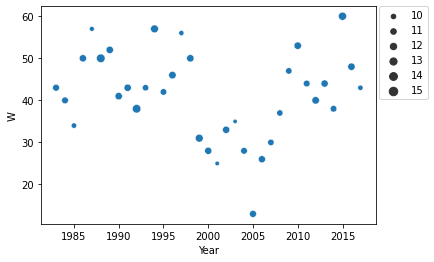

BOS


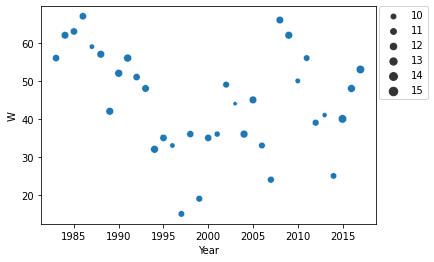

BRK


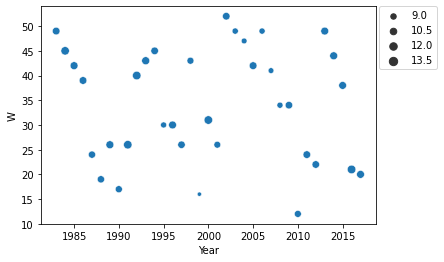

CHA


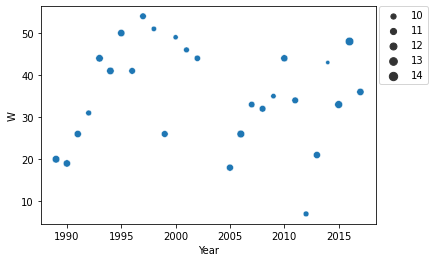

CHI


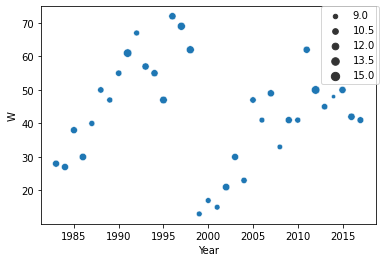

CLE


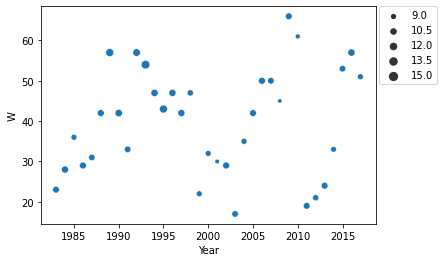

DAL


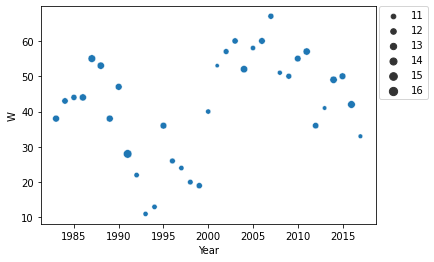

DEN


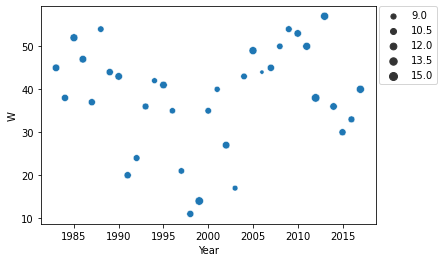

DET


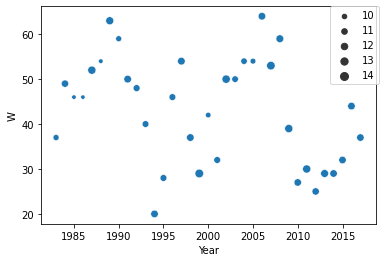

GSW


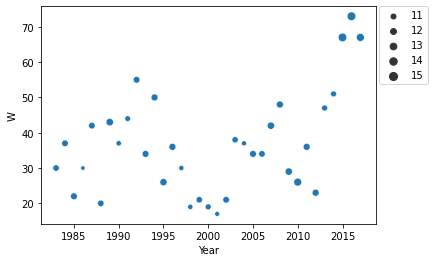

HOU


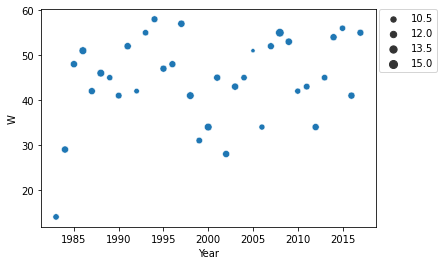

IND


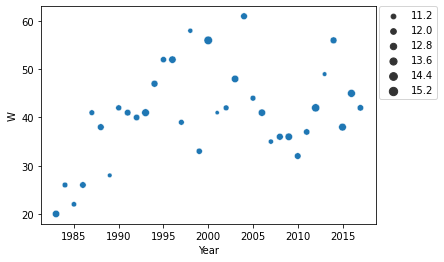

LAC


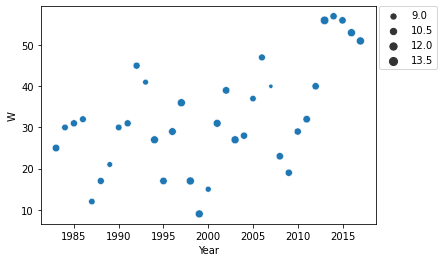

LAL


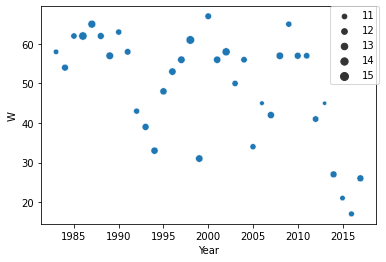

MEM


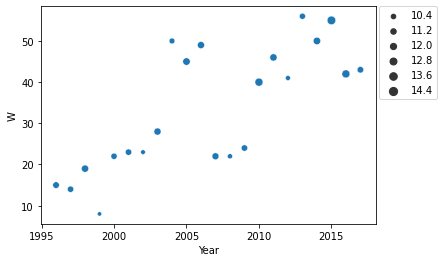

MIA


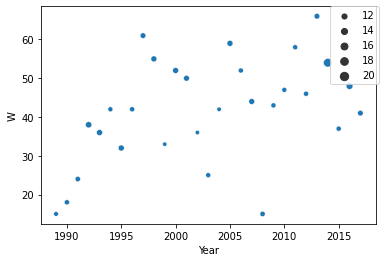

MIL


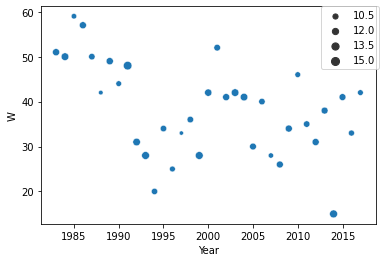

MIN


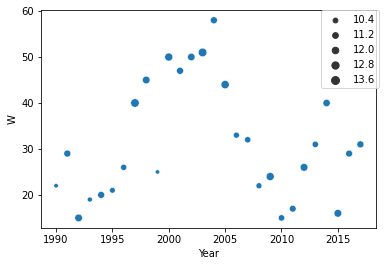

NOP


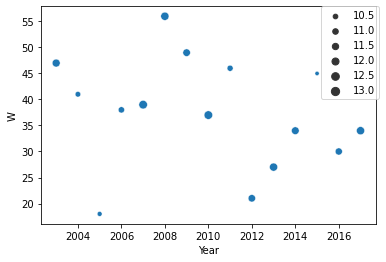

NYK


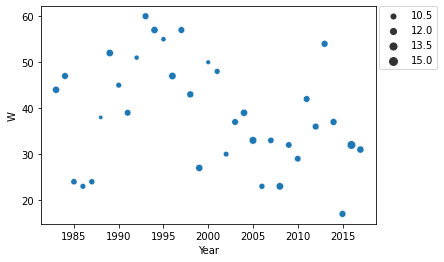

OKC


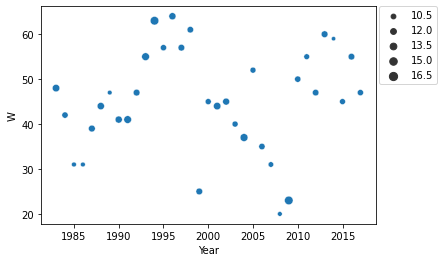

ORL


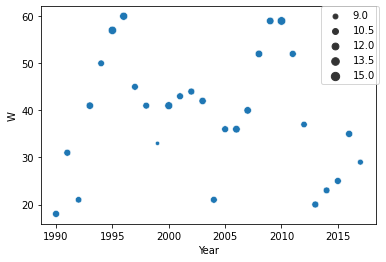

PHI


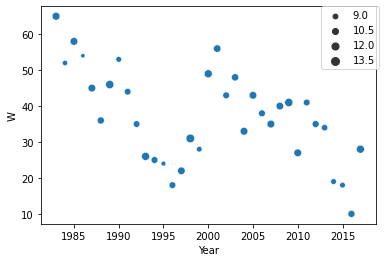

PHO


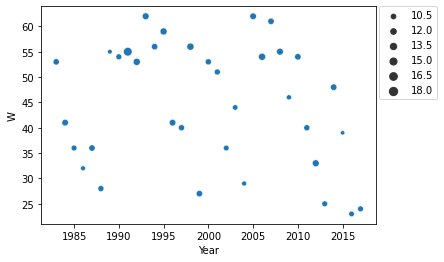

POR


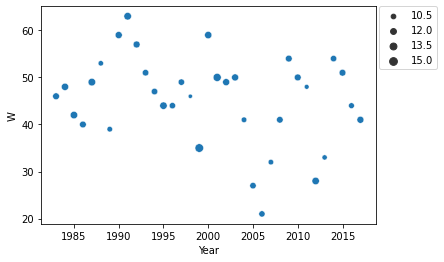

SAC


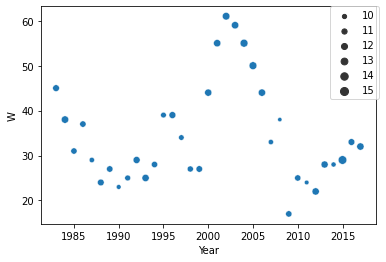

SAS


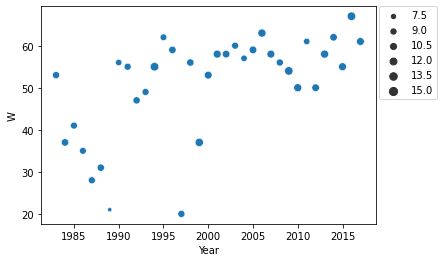

TOR


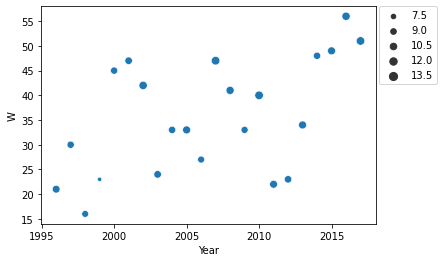

UTA


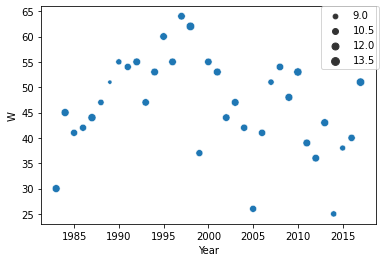

WAS


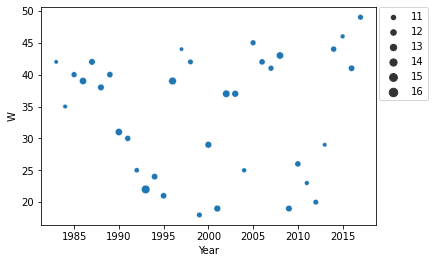

In [23]:
for team in team_rankings['Tm'].unique():
  print(team)
  sns.scatterplot(data=team_rankings[(team_rankings['Tm'] == team)], x='Year', y='W', size='PER')
  plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
  plt.show()

<function matplotlib.pyplot.show>

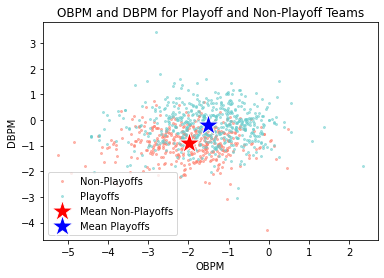

In [43]:
plt.scatter('OBPM', 'DBPM', s = 4, c = '#fe7d6a', alpha = 0.5, label = 'Non-Playoffs', data = team_rankings[(team_rankings['Playoffs'] == 0)])
plt.scatter('OBPM', 'DBPM', s = 4, c = '#66cccc', alpha = 0.5, label = 'Playoffs', data = team_rankings[(team_rankings['Playoffs'] != 0)])
plt.scatter(team_rankings[(team_rankings['Playoffs'] == 0)]['OBPM'].mean(), 
            team_rankings[(team_rankings['Playoffs'] == 0)]['DBPM'].mean(), s = 500, c = 'r',
            marker = '*', edgecolors = 'w', label = 'Mean Non-Playoffs')
plt.scatter(team_rankings[(team_rankings['Playoffs'] != 0)]['OBPM'].mean(), 
            team_rankings[(team_rankings['Playoffs'] != 0)]['DBPM'].mean(), s = 500, c = 'b',
            marker = '*', edgecolors = 'w', label = 'Mean Playoffs')
plt.title('OBPM and DBPM for Playoff and Non-Playoff Teams')
plt.xlabel('OBPM')
plt.ylabel('DBPM')
plt.legend(loc = 'lower left')
plt.show

# **Hypothesis 1**

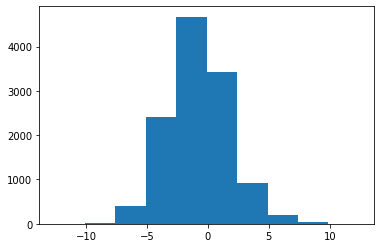

In [24]:
plt.hist(player_w_standings[(player_w_standings['Role'] != 0)]['OBPM'])
plt.show()

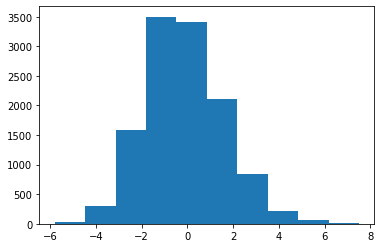

In [25]:
plt.hist(player_w_standings[(player_w_standings['Role'] != 0)]['DBPM'])
plt.show()

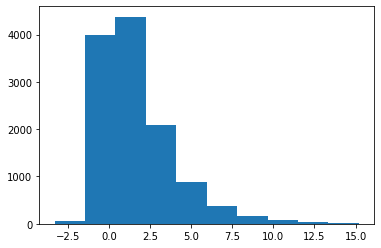

In [26]:
plt.hist(player_w_standings[(player_w_standings['Role'] != 0)]['OWS'])
plt.show()

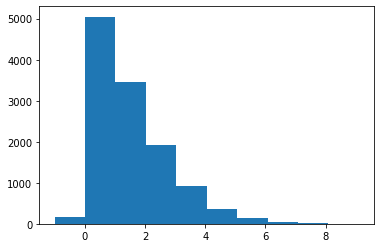

In [27]:
plt.hist(player_w_standings[(player_w_standings['Role'] != 0)]['DWS'])
plt.show()

In [28]:
#Perform t-test for OBPM

stats.ttest_ind(player_w_standings[(player_w_standings['Role'] == 2)]['OBPM'], player_w_standings[(player_w_standings['Role'] == 1)]['OBPM'])

Ttest_indResult(statistic=51.458732720829396, pvalue=0.0)

In [29]:
#Perform t-test for DBPM

stats.ttest_ind(player_w_standings[(player_w_standings['Role'] == 2)]['DBPM'], player_w_standings[(player_w_standings['Role'] == 1)]['DBPM'])

Ttest_indResult(statistic=20.766685926305076, pvalue=3.7866425818618126e-94)

In [30]:
#Perform t-test for OWS

stats.ttest_ind(player_w_standings[(player_w_standings['Role'] == 2)]['OWS'], player_w_standings[(player_w_standings['Role'] == 1)]['OWS'])

Ttest_indResult(statistic=55.25652133428719, pvalue=0.0)

In [31]:
#Perform t-test for DWS

stats.ttest_ind(player_w_standings[(player_w_standings['Role'] == 2)]['DWS'], player_w_standings[(player_w_standings['Role'] == 1)]['DWS'])

Ttest_indResult(statistic=55.00670583249757, pvalue=0.0)

In [32]:
#Calculate confidence interval for OBPM

n1_OBPM_1 = player_w_standings[(player_w_standings['Role'] == 2)]['OBPM'].shape[0]
avg1_OBPM_1 = player_w_standings[(player_w_standings['Role'] == 2)]['OBPM'].mean()
std1_OBPM_1 = player_w_standings[(player_w_standings['Role'] == 2)]['OBPM'].var()

n2_OBPM_1 = player_w_standings[(player_w_standings['Role'] == 1)]['OBPM'].shape[0]
avg2_OBPM_1 = player_w_standings[(player_w_standings['Role'] == 1)]['OBPM'].mean()
std2_OBPM_1 = player_w_standings[(player_w_standings['Role'] == 1)]['OBPM'].var()

upper_OBPM_1 = (avg1_OBPM_1 - avg2_OBPM_1) + 1.96*math.sqrt(std1_OBPM_1/n1_OBPM_1 + std2_OBPM_1/n2_OBPM_1)
lower_OBPM_1 = (avg1_OBPM_1 - avg2_OBPM_1) - 1.96*math.sqrt(std1_OBPM_1/n1_OBPM_1 + std2_OBPM_1/n2_OBPM_1)

print(lower_OBPM_1, upper_OBPM_1)

2.061285340814143 2.225631638207621


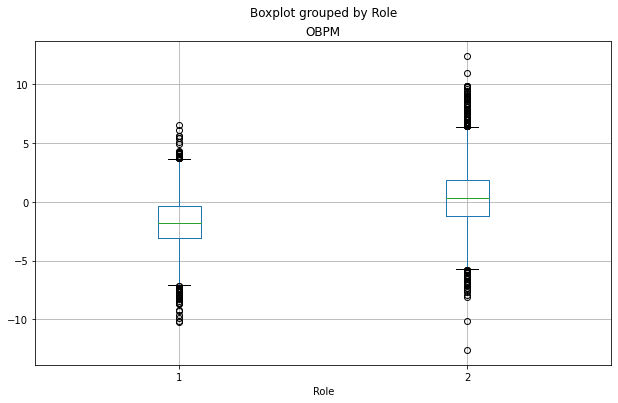

In [33]:
player_w_standings[(player_w_standings['Role'] != 0)].boxplot('OBPM', by='Role', figsize=(10, 6))

In [34]:
#Calculate confidence interval for DBPM

n1_DBPM_1 = player_w_standings[(player_w_standings['Role'] == 2)]['DBPM'].shape[0]
avg1_DBPM_1 = player_w_standings[(player_w_standings['Role'] == 2)]['DBPM'].mean()
std1_DBPM_1 = player_w_standings[(player_w_standings['Role'] == 2)]['DBPM'].var()

n2_DBPM_1 = player_w_standings[(player_w_standings['Role'] == 1)]['DBPM'].shape[0]
avg2_DBPM_1 = player_w_standings[(player_w_standings['Role'] == 1)]['DBPM'].mean()
std2_DBPM_1 = player_w_standings[(player_w_standings['Role'] == 1)]['DBPM'].var()

upper_DBPM_1 = (avg1_DBPM_1 - avg2_DBPM_1) + 1.96*math.sqrt(std1_DBPM_1/n1_DBPM_1 + std2_DBPM_1/n2_DBPM_1)
lower_DBPM_1 = (avg1_DBPM_1 - avg2_DBPM_1) - 1.96*math.sqrt(std1_DBPM_1/n1_DBPM_1 + std2_DBPM_1/n2_DBPM_1)

print(lower_DBPM_1, upper_DBPM_1)

0.5795800062177041 0.7006797776828129


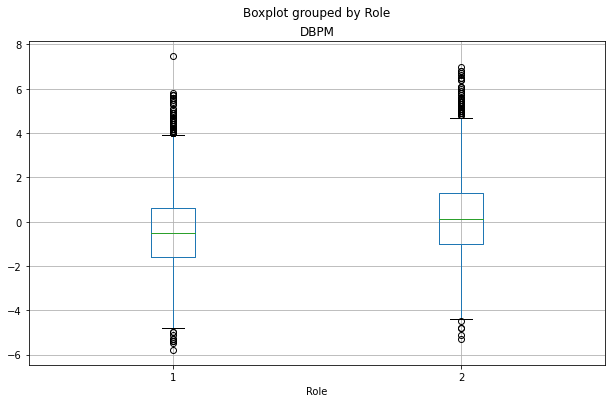

In [35]:
player_w_standings[(player_w_standings['Role'] != 0)].boxplot('DBPM', by='Role', figsize=(10, 6))

In [36]:
#Calculate confidence interval for OWS

n1_OWS_1 = player_w_standings[(player_w_standings['Role'] == 2)]['OWS'].shape[0]
avg1_OWS_1 = player_w_standings[(player_w_standings['Role'] == 2)]['OWS'].mean()
std1_OWS_1 = player_w_standings[(player_w_standings['Role'] == 2)]['OWS'].var()

n2_OWS_1 = player_w_standings[(player_w_standings['Role'] == 1)]['OWS'].shape[0]
avg2_OWS_1 = player_w_standings[(player_w_standings['Role'] == 1)]['OWS'].mean()
std2_OWS_1 = player_w_standings[(player_w_standings['Role'] == 1)]['OWS'].var()

upper_OWS_1 = (avg1_OWS_1 - avg2_OWS_1) + 1.96*math.sqrt(std1_OWS_1/n1_OWS_1 + std2_OWS_1/n2_OWS_1)
lower_OWS_1 = (avg1_OWS_1 - avg2_OWS_1) - 1.96*math.sqrt(std1_OWS_1/n1_OWS_1 + std2_OWS_1/n2_OWS_1)

print(lower_OWS_1, upper_OWS_1)

1.933430742909152 2.079625477713608


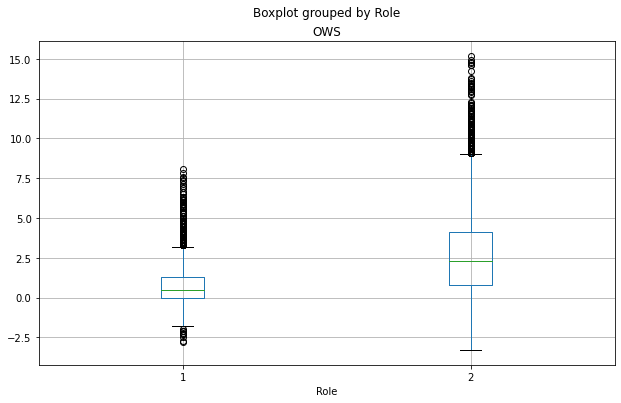

In [37]:
player_w_standings[(player_w_standings['Role'] != 0)].boxplot('OWS', by='Role', figsize=(10, 6))

In [38]:
#Calculate confidence interval for DWS

n1_DWS_1 = player_w_standings[(player_w_standings['Role'] == 2)]['DWS'].shape[0]
avg1_DWS_1 = player_w_standings[(player_w_standings['Role'] == 2)]['DWS'].mean()
std1_DWS_1 = player_w_standings[(player_w_standings['Role'] == 2)]['DWS'].var()

n2_DWS_1 = player_w_standings[(player_w_standings['Role'] == 1)]['DWS'].shape[0]
avg2_DWS_1 = player_w_standings[(player_w_standings['Role'] == 1)]['DWS'].mean()
std2_DWS_1 = player_w_standings[(player_w_standings['Role'] == 1)]['DWS'].var()

upper_DWS_1 = (avg1_DWS_1 - avg2_DWS_1) + 1.96*math.sqrt(std1_DWS_1/n1_DWS_1 + std2_DWS_1/n2_DWS_1)
lower_DWS_1 = (avg1_DWS_1 - avg2_DWS_1) - 1.96*math.sqrt(std1_DWS_1/n1_DWS_1 + std2_DWS_1/n2_DWS_1)

print(lower_DWS_1, upper_DWS_1)

1.0638357013403628 1.1443199416828653


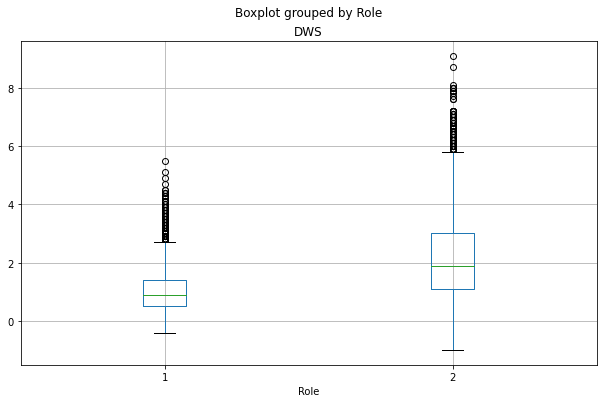

In [39]:
player_w_standings[(player_w_standings['Role'] != 0)].boxplot('DWS', by='Role', figsize=(10, 6))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


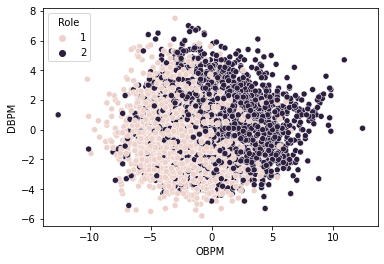

In [40]:
sns.scatterplot('OBPM', 'DBPM', hue = 'Role', data = player_w_standings[(player_w_standings['Role'] != 0)])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


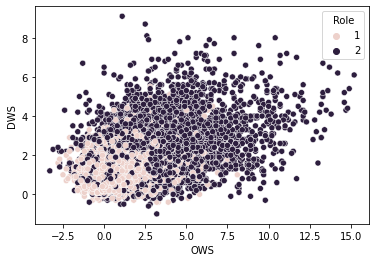

In [41]:
sns.scatterplot('OWS', 'DWS', hue = 'Role', data = player_w_standings[(player_w_standings['Role'] != 0)])

<function matplotlib.pyplot.show>

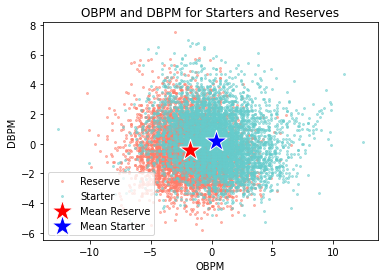

In [42]:
plt.scatter('OBPM', 'DBPM', s = 4, c = '#fe7d6a', alpha = 0.5, label = 'Reserve', data = player_w_standings[(player_w_standings['Role'] == 1)])
plt.scatter('OBPM', 'DBPM', s = 4, c = '#66cccc', alpha = 0.5, label = 'Starter', data = player_w_standings[(player_w_standings['Role'] == 2)])
plt.scatter(player_w_standings[(player_w_standings['Role'] == 1)]['OBPM'].mean(), 
            player_w_standings[(player_w_standings['Role'] == 1)]['DBPM'].mean(), s = 500, c = 'r',
            marker = '*', edgecolors = 'w', label = 'Mean Reserve')
plt.scatter(player_w_standings[(player_w_standings['Role'] == 2)]['OBPM'].mean(), 
            player_w_standings[(player_w_standings['Role'] == 2)]['DBPM'].mean(), s = 500, c = 'b',
            marker = '*', edgecolors = 'w', label = 'Mean Starter')
plt.title('OBPM and DBPM for Starters and Reserves')
plt.xlabel('OBPM')
plt.ylabel('DBPM')
plt.legend(loc = 'lower left')
plt.show

## **Hypothesis 1 Results**

There is a statistically significant difference between the differences in OBPM, DBPM, OWS, and DWS between starters and reserves. We reject the null hypothesis with p-values of <0.001 for all 4 statistical categories. Starters had a higher score for all 4 statistical categories, with larger differences in the offensive statistics than defensive statistics. We can therefore conclude that starters are significantly better than reserves on both offense and defense. The differences between starters and reserves for all 4 statistical categories is therefore worth examining further in hypotheses 2 and 3.

# **Hypothesis 2**

In [44]:
#Create dataframe with only starters and only reserves

player_starters = player_w_standings[(player_w_standings['Role']== 2)].copy()
player_reserves = player_w_standings[(player_w_standings['Role']== 1)].copy()

In [47]:
#Find team averages for starter and reserve players for each team for each season

team_starter_rankings = player_starters.groupby(['Tm', 'Year'], as_index=False).mean()
team_reserve_rankings = player_reserves.groupby(['Tm', 'Year'], as_index=False).mean()

In [50]:
#Merge starter and reserve dataframes

team_rankings_byrole = pd.merge(team_starter_rankings, team_reserve_rankings, on = ['Year', 'Tm'], suffixes=('_starter', '_reserve'))

In [68]:
#Calculate difference between average starter and reserve OBPM, DBPM, OWS, and DWS

team_rankings_byrole['Playoff_qual'] = np.where(team_rankings_byrole['Playoffs_starter'] > 0, 1, 0)
team_rankings_byrole['OBPM_diff'] = team_rankings_byrole['OBPM_starter'] - team_rankings_byrole['OBPM_reserve']
team_rankings_byrole['DBPM_diff'] = team_rankings_byrole['DBPM_starter'] - team_rankings_byrole['DBPM_reserve']
team_rankings_byrole['OWS_diff'] = team_rankings_byrole['OWS_starter'] - team_rankings_byrole['OWS_reserve']
team_rankings_byrole['DWS_diff'] = team_rankings_byrole['DWS_starter'] - team_rankings_byrole['DWS_reserve']

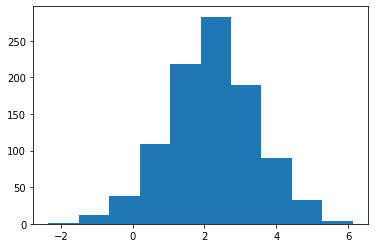

In [54]:
plt.hist(team_rankings_byrole['OBPM_diff'])
plt.show()

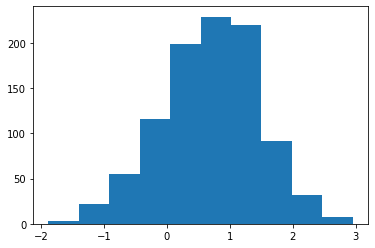

In [55]:
plt.hist(team_rankings_byrole['DBPM_diff'])
plt.show()

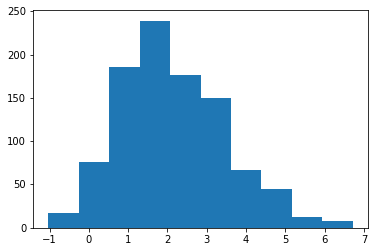

In [56]:
plt.hist(team_rankings_byrole['OWS_diff'])
plt.show()

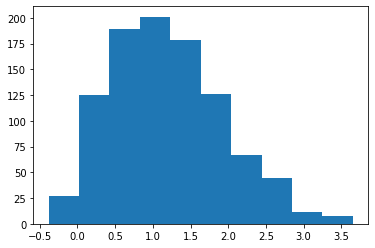

In [57]:
plt.hist(team_rankings_byrole['DWS_diff'])
plt.show()

In [89]:
team_rankings_byrole[['Tm', 'Year', 'OBPM_diff', 'DBPM_diff', 'OWS_diff', 'DWS_diff', 'Playoff_qual']].head()

,Tm,Year,OBPM_diff,DBPM_diff,OWS_diff,DWS_diff,Playoff_qual
0,ATL,1983,3.116667,0.245238,2.071429,1.769048,1
1,ATL,1984,2.866667,0.583333,1.516667,1.866667,1
2,ATL,1985,2.174286,0.505714,1.365714,0.897143,0
3,ATL,1986,1.276190,1.480952,1.364286,1.211905,1
4,ATL,1987,2.502500,0.547500,3.775000,1.912500,1


In [60]:
#Perform t-test for OBPM

stats.ttest_ind(team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['OBPM_diff'], 
                team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['OBPM_diff'])

Ttest_indResult(statistic=10.46784284082516, pvalue=2.2542367466517242e-24)

In [61]:
#Perform t-test for DBPM

stats.ttest_ind(team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['DBPM_diff'], 
                team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['DBPM_diff'])

Ttest_indResult(statistic=6.841179117041314, pvalue=1.3862034293251763e-11)

In [62]:
#Perform t-test for OWS

stats.ttest_ind(team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['OWS_diff'], 
                team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['OWS_diff'])

Ttest_indResult(statistic=17.06542086437553, pvalue=2.494316230790151e-57)

In [63]:
#Perform t-test for DWS

stats.ttest_ind(team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['DWS_diff'], 
                team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['DWS_diff'])

Ttest_indResult(statistic=20.230013046871555, pvalue=3.020010354589538e-76)

In [87]:
#Calculate confidence interval for OBPM

n1_OBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['OBPM_diff'].shape[0]
avg1_OBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['OBPM_diff'].mean()
std1_OBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['OBPM_diff'].var()

n2_OBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['OBPM_diff'].shape[0]
avg2_OBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['OBPM_diff'].mean()
std2_OBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['OBPM_diff'].var()

upper_OBPM_2 = (avg1_OBPM_2 - avg2_OBPM_2) + 1.96*math.sqrt(std1_OBPM_2/n1_OBPM_2 + std2_OBPM_2/n2_OBPM_2)
lower_OBPM_2 = (avg1_OBPM_2 - avg2_OBPM_2) - 1.96*math.sqrt(std1_OBPM_2/n1_OBPM_2 + std2_OBPM_2/n2_OBPM_2)

print(avg1_OBPM_2, avg2_OBPM_2)
print(lower_OBPM_2, avg1_OBPM_2 - avg2_OBPM_2, upper_OBPM_2)

2.5504953894027667 1.765332998350857
0.6400222929230708 0.7851623910519097 0.9303024891807485


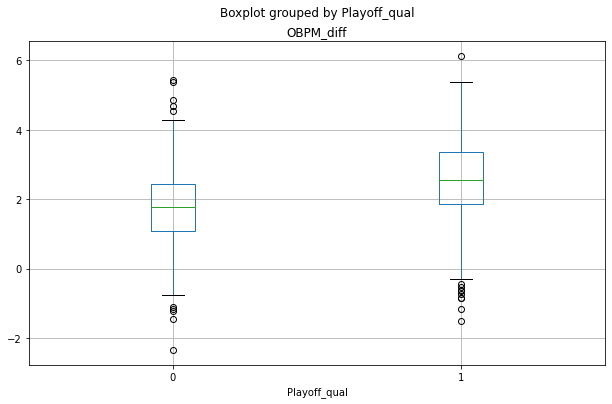

In [70]:
team_rankings_byrole.boxplot('OBPM_diff', by='Playoff_qual', figsize=(10, 6))

In [86]:
#Calculate confidence interval for DBPM

n1_DBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['DBPM_diff'].shape[0]
avg1_DBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['DBPM_diff'].mean()
std1_DBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['DBPM_diff'].var()

n2_DBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['DBPM_diff'].shape[0]
avg2_DBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['DBPM_diff'].mean()
std2_DBPM_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['DBPM_diff'].var()

upper_DBPM_2 = (avg1_DBPM_2 - avg2_DBPM_2) + 1.96*math.sqrt(std1_DBPM_2/n1_DBPM_2 + std2_DBPM_2/n2_DBPM_2)
lower_DBPM_2 = (avg1_DBPM_2 - avg2_DBPM_2) - 1.96*math.sqrt(std1_DBPM_2/n1_DBPM_2 + std2_DBPM_2/n2_DBPM_2)

print(avg1_DBPM_2, avg2_DBPM_2)
print(lower_DBPM_2, avg1_DBPM_2 - avg2_DBPM_2, upper_DBPM_2)

0.8397904533516038 0.5064985741771454
0.2379393431724957 0.33329187917445846 0.4286444151764212


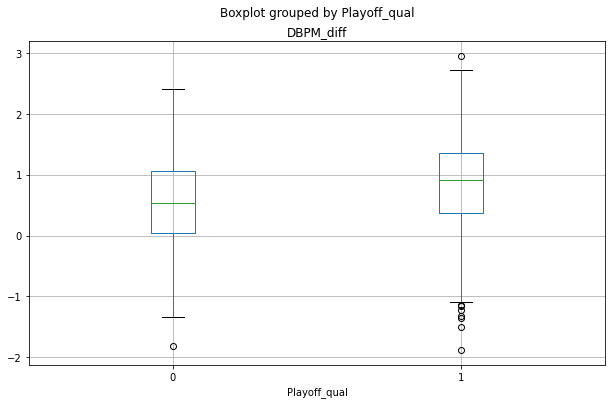

In [73]:
team_rankings_byrole.boxplot('DBPM_diff', by='Playoff_qual', figsize=(10, 6))

In [85]:
#Calculate confidence interval for OWS

n1_OWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['OWS_diff'].shape[0]
avg1_OWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['OWS_diff'].mean()
std1_OWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['OWS_diff'].var()

n2_OWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['OWS_diff'].shape[0]
avg2_OWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['OWS_diff'].mean()
std2_OWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['OWS_diff'].var()

upper_OWS_2 = (avg1_OWS_2 - avg2_OWS_2) + 1.96*math.sqrt(std1_OWS_2/n1_OWS_2 + std2_OWS_2/n2_OWS_2)
lower_OWS_2 = (avg1_OWS_2 - avg2_OWS_2) - 1.96*math.sqrt(std1_OWS_2/n1_OWS_2 + std2_OWS_2/n2_OWS_2)

print(avg1_OWS_2, avg2_OWS_2)
print(lower_OWS_2, avg1_OWS_2 - avg2_OWS_2, upper_OWS_2)

2.6920366563891767 1.3928859599395316
1.1552693727970365 1.299150696449645 1.4430320201022537


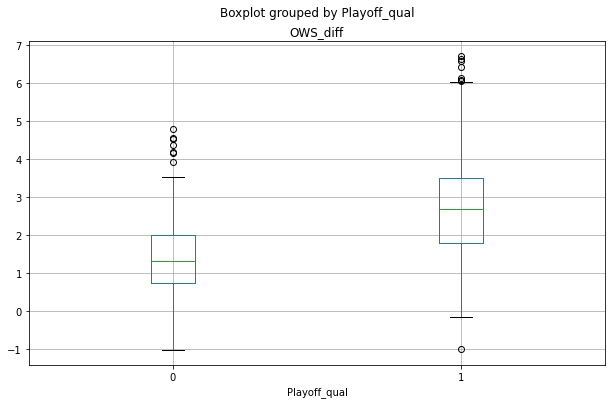

In [76]:
team_rankings_byrole.boxplot('OWS_diff', by='Playoff_qual', figsize=(10, 6))

In [84]:
#Calculate confidence interval for DWS

n1_DWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['DWS_diff'].shape[0]
avg1_DWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['DWS_diff'].mean()
std1_DWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['DWS_diff'].var()

n2_DWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['DWS_diff'].shape[0]
avg2_DWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['DWS_diff'].mean()
std2_DWS_2 = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['DWS_diff'].var()

upper_DWS_2 = (avg1_DWS_2 - avg2_DWS_2) + 1.96*math.sqrt(std1_DWS_2/n1_DWS_2 + std2_DWS_2/n2_DWS_2)
lower_DWS_2 = (avg1_DWS_2 - avg2_DWS_2) - 1.96*math.sqrt(std1_DWS_2/n1_DWS_2 + std2_DWS_2/n2_DWS_2)

print(avg1_DWS_2, avg2_DWS_2)
print(lower_DWS_2, avg1_DWS_2 - avg2_DWS_2, upper_DWS_2)

1.5380694729930355 0.7337534700748992
0.729857522351241 0.8043160029181363 0.8787744834850316


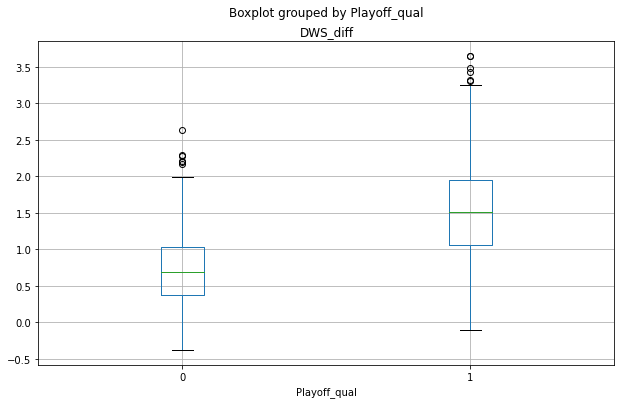

In [77]:
team_rankings_byrole.boxplot('DWS_diff', by='Playoff_qual', figsize=(10, 6))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


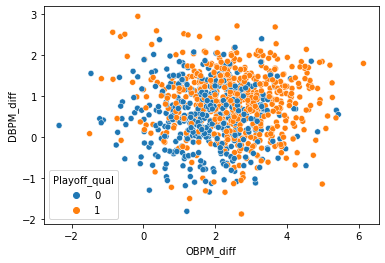

In [78]:
sns.scatterplot('OBPM_diff', 'DBPM_diff', hue = 'Playoff_qual', data = team_rankings_byrole)

<function matplotlib.pyplot.show>

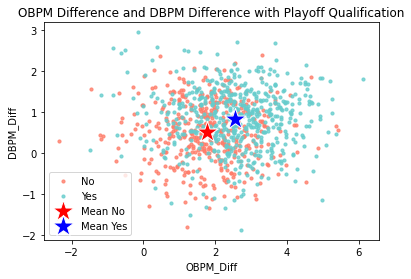

In [79]:
plt.scatter('OBPM_diff', 'DBPM_diff', s = 10, c = '#fe7d6a', alpha = 0.8, label = 'No', data = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)])
plt.scatter('OBPM_diff', 'DBPM_diff', s = 10, c = '#66cccc', alpha = 0.8, label = 'Yes', data = team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)])
plt.scatter(team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['OBPM_diff'].mean(), 
            team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 0)]['DBPM_diff'].mean(), s = 500, c = 'r',
            marker = '*', edgecolors = 'w', label = 'Mean No')
plt.scatter(team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['OBPM_diff'].mean(), 
            team_rankings_byrole[(team_rankings_byrole['Playoff_qual'] == 1)]['DBPM_diff'].mean(), s = 500, c = 'b',
            marker = '*', edgecolors = 'w', label = 'Mean Yes')
plt.title('OBPM Difference and DBPM Difference with Playoff Qualification')
plt.xlabel('OBPM_Diff')
plt.ylabel('DBPM_Diff')
plt.legend(loc = 'lower left')
plt.show

## **Hypothesis 2 Results**

There is a statistically significant difference between the differences in OBPM, DBPM, OWS, and DWS between the starters and reserves for playoff-qualifying teams and non-playoff qualifying teams. We reject the null hypothesis with p-values of <0.001 for all 4 statistical categories. Playoff-qualifying teams had larger differences than non-playoff qualifying teams for all 4 statistical categories, with larger differences in the offensive statistics than defensive statistics. We can therefore conclude that starters have a greater impact on playoff qualification than reserves, and that the offensive performance of the starters has a greater influence on playoff qualification than defensive performance.

# **Hypothesis 3**

In [ ]:
players_pg = y82_player_stats[(y82_player_stats.POS_final == 'PG') & (y82_player_stats.Role != 0)].copy()
players_sg = y82_player_stats[(y82_player_stats.POS_final == 'SG') & (y82_player_stats.Role != 0)].copy()
players_sf = y82_player_stats[(y82_player_stats.POS_final == 'SF') & (y82_player_stats.Role != 0)].copy()
players_pf = y82_player_stats[(y82_player_stats.POS_final == 'PF') & (y82_player_stats.Role != 0)].copy()
players_c = y82_player_stats[(y82_player_stats.POS_final == 'C') & (y82_player_stats.Role != 0)].copy()

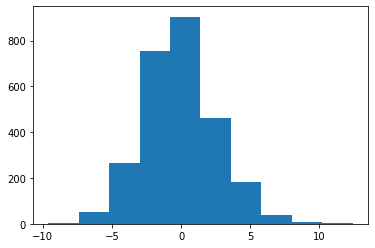

In [ ]:
plt.hist(players_pg[(players_pg.Role != 0)].OBPM)
plt.show()

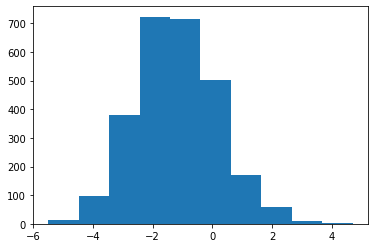

In [ ]:
plt.hist(players_pg[(players_pg.Role != 0)].DBPM)
plt.show()

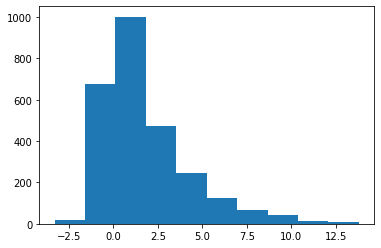

In [ ]:
plt.hist(players_pg[(players_pg.Role != 0)].OWS)
plt.show()

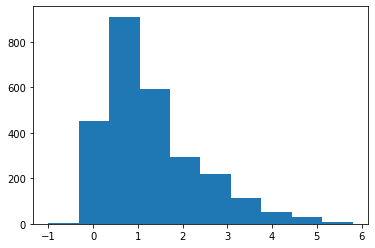

In [ ]:
plt.hist(players_pg[(players_pg.Role != 0)].DWS)
plt.show()

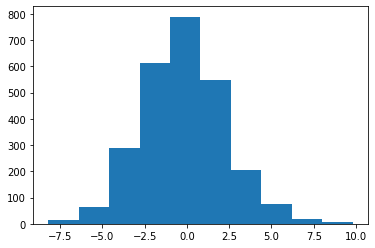

In [ ]:
plt.hist(players_sg[(players_sg.Role != 0)].OBPM)
plt.show()

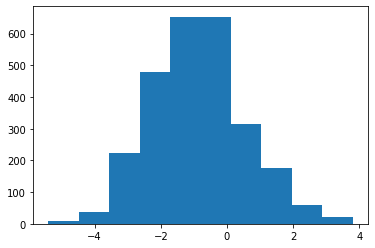

In [ ]:
plt.hist(players_sg[(players_sg.Role != 0)].DBPM)
plt.show()

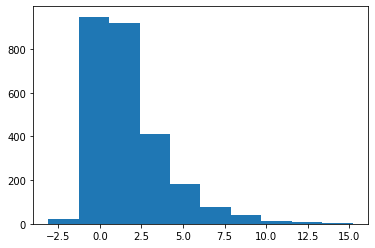

In [ ]:
plt.hist(players_sg[(players_sg.Role != 0)].OWS)
plt.show()

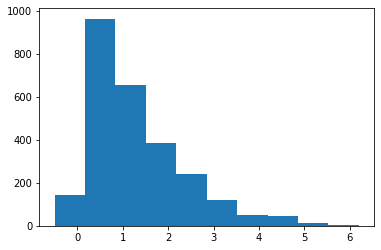

In [ ]:
plt.hist(players_sg[(players_sg.Role != 0)].DWS)
plt.show()

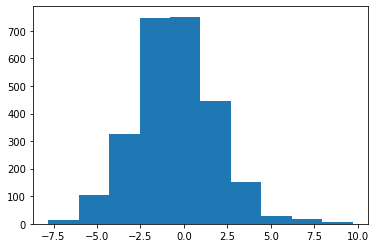

In [ ]:
plt.hist(players_sf[(players_sf.Role != 0)].OBPM)
plt.show()

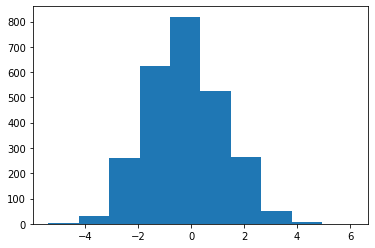

In [ ]:
plt.hist(players_sf[(players_sf.Role != 0)].DBPM)
plt.show()

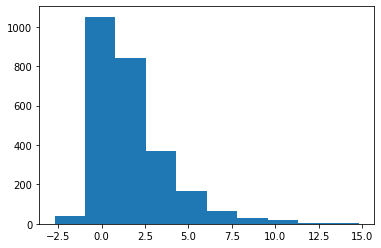

In [ ]:
plt.hist(players_sf[(players_sf.Role != 0)].OWS)
plt.show()

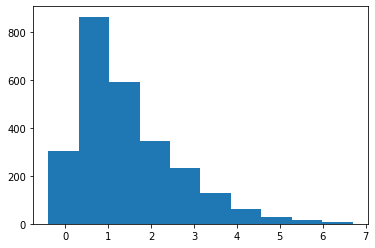

In [ ]:
plt.hist(players_sf[(players_sf.Role != 0)].DWS)
plt.show()

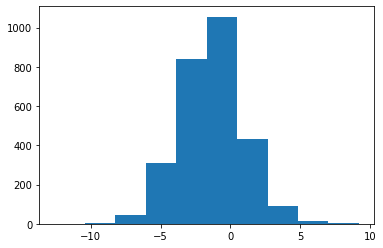

In [ ]:
plt.hist(players_pf[(players_pf.Role != 0)].OBPM)
plt.show()

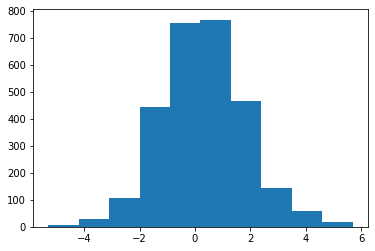

In [ ]:
plt.hist(players_pf[(players_pf.Role != 0)].DBPM)
plt.show()

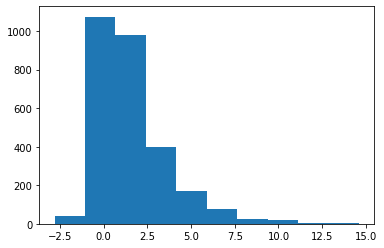

In [ ]:
plt.hist(players_pf[(players_pf.Role != 0)].OWS)
plt.show()

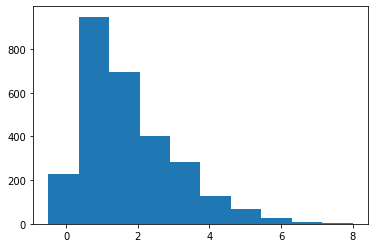

In [ ]:
plt.hist(players_pf[(players_pf.Role != 0)].DWS)
plt.show()

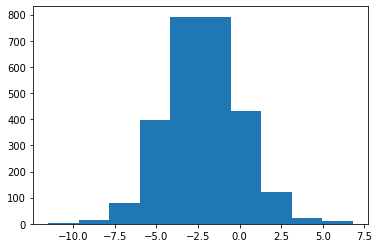

In [ ]:
plt.hist(players_c[(players_c.Role != 0)].OBPM)
plt.show()

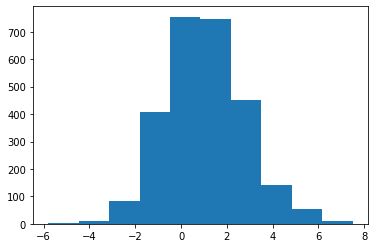

In [ ]:
plt.hist(players_c[(players_c.Role != 0)].DBPM)
plt.show()

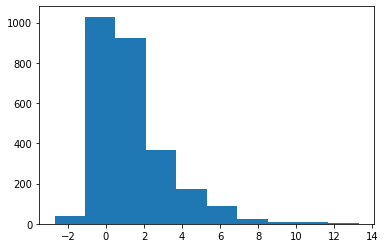

In [ ]:
plt.hist(players_c[(players_c.Role != 0)].OWS)
plt.show()

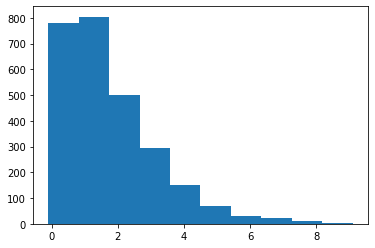

In [ ]:
plt.hist(players_c[(players_c.Role != 0)].DWS)
plt.show()

In [ ]:
stats.f_oneway(players_pg.OBPM, players_sg.OBPM, players_sf.OBPM, players_pf.OBPM, players_c.OBPM)

F_onewayResult(statistic=393.1327990665157, pvalue=1.148e-320)

In [ ]:
stats.f_oneway(players_pg.DBPM, players_sg.DBPM, players_sf.DBPM, players_pf.DBPM, players_c.DBPM)

F_onewayResult(statistic=1013.998822018715, pvalue=0.0)

In [ ]:
stats.f_oneway(players_pg.OWS, players_sg.OWS, players_sf.OWS, players_pf.OWS, players_c.OWS)

F_onewayResult(statistic=16.214141682676928, pvalue=2.970232694389932e-13)

In [ ]:
stats.f_oneway(players_pg.DWS, players_sg.DWS, players_sf.DWS, players_pf.DWS, players_c.DWS)

F_onewayResult(statistic=99.42146951413322, pvalue=1.5650361364684957e-83)

In [ ]:
tukey_OBPM = pairwise_tukeyhsd(endog = y82_player_stats[(y82_player_stats.Role != 0)].OBPM,
                          groups = y82_player_stats[(y82_player_stats.Role != 0)].POS_final,
                          alpha=0.05)

tukey_OBPM.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,PF,0.8806,0.001,0.7046,1.0565,True
C,PG,2.1684,0.001,1.9905,2.3463,True
C,SF,1.7291,0.001,1.5498,1.9084,True
C,SG,2.0502,0.001,1.8715,2.2289,True
PF,PG,1.2879,0.001,1.112,1.4637,True
PF,SF,0.8485,0.001,0.6713,1.0258,True
PF,SG,1.1696,0.001,0.993,1.3463,True
PG,SF,-0.4393,0.001,-0.6185,-0.2601,True
PG,SG,-0.1183,0.3705,-0.2968,0.0603,False
SF,SG,0.3211,0.001,0.1411,0.5011,True


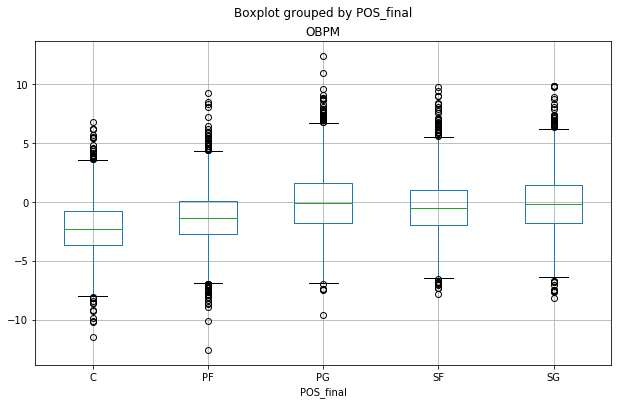

In [ ]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('OBPM', by='POS_final', figsize=(10, 6))

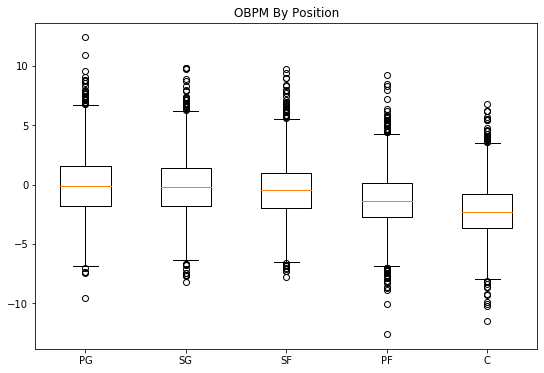

In [ ]:
data_to_plot = [y82_player_stats[(y82_player_stats.Role != 0) & (y82_player_stats.POS_final == 'PG')].OBPM,
                y82_player_stats[(y82_player_stats.Role != 0) & (y82_player_stats.POS_final == 'SG')].OBPM,
                y82_player_stats[(y82_player_stats.Role != 0) & (y82_player_stats.POS_final == 'SF')].OBPM,
                y82_player_stats[(y82_player_stats.Role != 0) & (y82_player_stats.POS_final == 'PF')].OBPM,
                y82_player_stats[(y82_player_stats.Role != 0) & (y82_player_stats.POS_final == 'C')].OBPM,]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.set_title('OBPM By Position')
ax.set_xticklabels(['PG', 'SG', 'SF', 'PF', 'C'])
bp = ax.boxplot(data_to_plot)

In [ ]:
tukey_DBPM = pairwise_tukeyhsd(endog = y82_player_stats[(y82_player_stats.Role != 0)].DBPM,
                          groups = y82_player_stats[(y82_player_stats.Role != 0)].POS_final,
                          alpha=0.05)

tukey_DBPM.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,PF,-0.6823,0.001,-0.7933,-0.5713,True
C,PG,-2.2758,0.001,-2.388,-2.1636,True
C,SF,-1.3012,0.001,-1.4143,-1.188,True
C,SG,-1.9478,0.001,-2.0605,-1.8351,True
PF,PG,-1.5935,0.001,-1.7044,-1.4825,True
PF,SF,-0.6188,0.001,-0.7307,-0.507,True
PF,SG,-1.2655,0.001,-1.3769,-1.154,True
PG,SF,0.9746,0.001,0.8616,1.0877,True
PG,SG,0.328,0.001,0.2154,0.4407,True
SF,SG,-0.6466,0.001,-0.7602,-0.5331,True


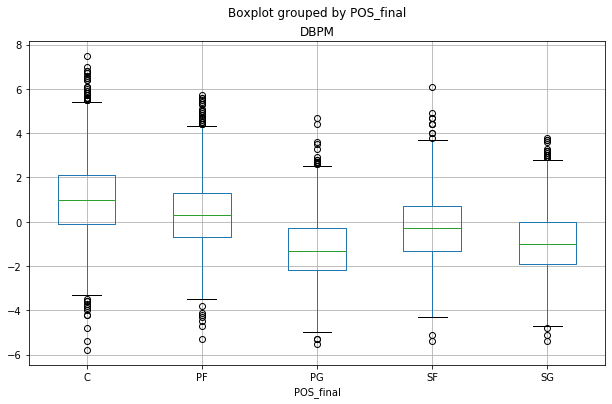

In [ ]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('DBPM', by='POS_final', figsize=(10, 6))

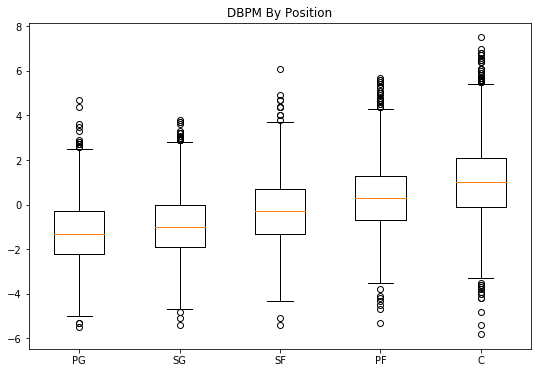

In [ ]:
data_to_plot2 = [y82_player_stats[(y82_player_stats.Role != 0) & (y82_player_stats.POS_final == 'PG')].DBPM,
                y82_player_stats[(y82_player_stats.Role != 0) & (y82_player_stats.POS_final == 'SG')].DBPM,
                y82_player_stats[(y82_player_stats.Role != 0) & (y82_player_stats.POS_final == 'SF')].DBPM,
                y82_player_stats[(y82_player_stats.Role != 0) & (y82_player_stats.POS_final == 'PF')].DBPM,
                y82_player_stats[(y82_player_stats.Role != 0) & (y82_player_stats.POS_final == 'C')].DBPM,]

fig2 = plt.figure(1, figsize=(9, 6))
ax2 = fig2.add_subplot(111)
ax2.set_title('DBPM By Position')
ax2.set_xticklabels(['PG', 'SG', 'SF', 'PF', 'C'])
bp2 = ax2.boxplot(data_to_plot2)

In [ ]:
tukey_OWS = pairwise_tukeyhsd(endog = y82_player_stats[(y82_player_stats.Role != 0)].OWS,
                          groups = y82_player_stats[(y82_player_stats.Role != 0)].POS_final,
                          alpha=0.05)

tukey_OWS.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,PF,0.2689,0.001,0.1079,0.43,True
C,PG,0.4372,0.001,0.2743,0.6,True
C,SF,0.3333,0.001,0.1692,0.4974,True
C,SG,0.3789,0.001,0.2154,0.5424,True
PF,PG,0.1682,0.0354,0.0073,0.3292,True
PF,SF,0.0644,0.7909,-0.0979,0.2266,False
PF,SG,0.11,0.3418,-0.0517,0.2717,False
PG,SF,-0.1038,0.419,-0.2678,0.0602,False
PG,SG,-0.0582,0.8537,-0.2217,0.1052,False
SF,SG,0.0456,0.9,-0.1191,0.2103,False


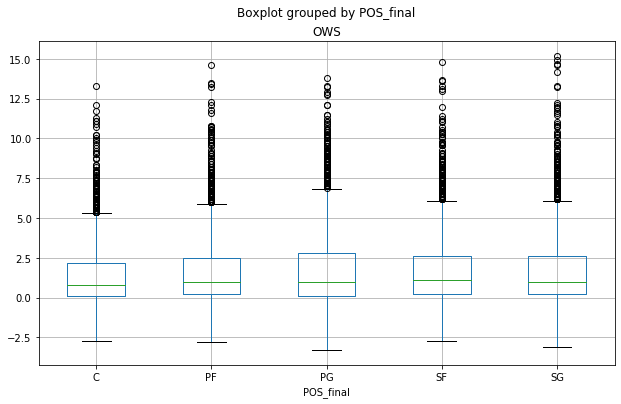

In [ ]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('OWS', by='POS_final', figsize=(10, 6))

In [ ]:
tukey_DWS = pairwise_tukeyhsd(endog = y82_player_stats[(y82_player_stats.Role != 0)].DWS,
                          groups = y82_player_stats[(y82_player_stats.Role != 0)].POS_final,
                          alpha=0.05)

tukey_DWS.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,PF,-0.0451,0.613,-0.1331,0.043,False
C,PG,-0.4817,0.001,-0.5707,-0.3927,True
C,SF,-0.298,0.001,-0.3877,-0.2083,True
C,SG,-0.4743,0.001,-0.5637,-0.3849,True
PF,PG,-0.4366,0.001,-0.5246,-0.3487,True
PF,SF,-0.253,0.001,-0.3417,-0.1643,True
PF,SG,-0.4293,0.001,-0.5176,-0.3409,True
PG,SF,0.1837,0.001,0.094,0.2733,True
PG,SG,0.0074,0.9,-0.082,0.0967,False
SF,SG,-0.1763,0.001,-0.2663,-0.0863,True


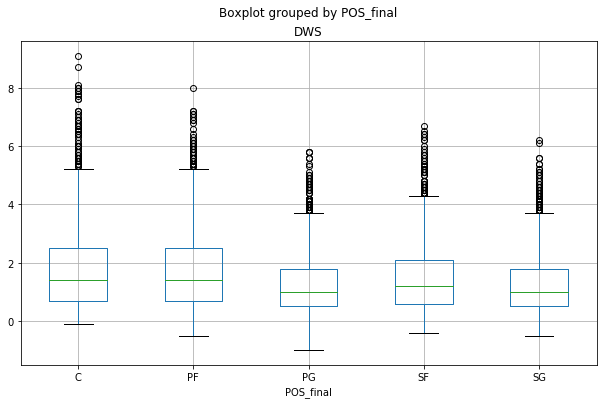

In [ ]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('DWS', by='POS_final', figsize=(10, 6))

## **Hypothesis 3 Results**

There are statistically significant differences between the 5 position groups in the cumulative statistics. The overall trends: PG and SG have the highest OBPM scores, significantly higher (p <0.001) versus the other 3 position groups, but no statistically significant difference between PG and SG (p = 0.37). OBPM produces more statistically significant results than OWS. C has the highest DBPM, significantly higher than all other position groups (p <0.001). C also has a significantly higher DWS than all position groups except PF (comparison of C versus PF p = 0.61). DBPM produces more statistically significant results than DWS. Generally, as you move up the position spectrum (PG -> SG -> SF -> PF -> C) offensive statistics decrease while defensive statistics increase, but not all adjacent position groups are statistically significant. This means that there is greater value in finding a point guard with high defensive value and greater harm in not finding a point guart with high offensive value, with the differences decreasing and eventually switching, to greater value in finding a center with high offensive value and greater harm in not finding a center with high defensive value. 
Overall, the box plus minus statistics show greater variation than win share statistics; whether that means box plus minus is a better statistic for analysis due to its ability to discern more differentiation or a worse statistic because it overestimates those differences is outside of the scope of this analysis.  The matching general trends of box plus minus statistics and win share statistics show that the overall trend is real, even if the size of the differentiation is harder to confidently identify.